# **Project Name**    - Book Recommendation System



##### **Project Type**    -Unsupervised
##### **Contribution**    - Individual
##### **Team Member** - RINA PATEL

# **Project Summary -**

Introduction:
 In this project, we have build Book Recommendation System using unsupervised machine learning techniques. and analyze book features, user preferences,ratings and purchase histories to generate tailored book recommendations. This system aims to enhance the user experience by helping readers discover books that align with their interests, leading to increased user engagement and satisfaction.

Personalized Recommendations: The primary objective of the project is to deliver book recommendations that cater to individual user preferences.

The Book-Crossing dataset comprises 3 files.

● Users :

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books :

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings :

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

Data Collection and Preprocessing: Gather a diverse dataset comprising information about books, such as title, author, genre, synopsis, and user data like purchase history and browsing behavior. This data is preprocessed to eliminate noise and inconsistencies.

Feature Engineering: Extract relevant features from books data, ratings data and users data.

Unsupervised Learning: The project focuses on employing unsupervised machine learning algorithms, such as Model Based Collaborative Filtering Recommender,Collaborative Filtering based Recommendation System-(Item Based), Collaborative Filtering based Recommendation System-(User based) and Popularity Based Filtering, to uncover patterns and similarities in books and user behavior.


Conclusion:
The Unsupervised Book Recommendation System project seeks to deliver a sophisticated and personalized book recommendation solution that empowers users to discover books that align with their interests. By leveraging unsupervised machine learning techniques, this project addresses the challenges of traditional recommendation systems and enhances the user experience by providing tailored recommendations, ultimately driving user engagement and satisfaction.

As the project advances and the system is deployed, continuous monitoring and feedback will play a crucial role in refining the recommendations and ensuring that users receive high-quality book suggestions.

# **GitHub Link -**
https://github.com/rins3005/Book_Recommendation_System.git

# **Problem Statement**


**During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.**

* **The main objective is to create a book recommendation system for users.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

#hide warnigs
import warnings
warnings.filterwarnings(action='ignore')


### Dataset Loading

In [2]:
#loading user.csv data as users_df
users_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System/Users.csv')

In [3]:
#loading user.csv data as books_df
books_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System/Books.csv')

In [4]:
#loading user.csv data as ratings_df
ratings_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System/Ratings.csv')

### Dataset First View

In [5]:
# Dataset First Look of users data
users_df.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [6]:
# Dataset First Look of books data
books_df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [7]:
# Dataset First Look of ratings data
ratings_df.head(10)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count of users data
users_df.shape

(278858, 3)

In [9]:
# Dataset Rows & Columns count of books data
books_df.shape

(271360, 8)

In [10]:
# Dataset Rows & Columns count of ratings data
ratings_df.shape

(1149780, 3)

### Dataset Information

In [11]:
# Dataset Info of users data
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
# Dataset Info of books data
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
# Dataset Info of ratings data
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count of users data
users_df.duplicated().sum()

0

In [15]:
# Dataset Duplicate Value Count of books data
books_df.duplicated().sum()

0

In [16]:
# Dataset Duplicate Value Count of ratings data
ratings_df.duplicated().sum()

0

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count of users data
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

<Axes: >

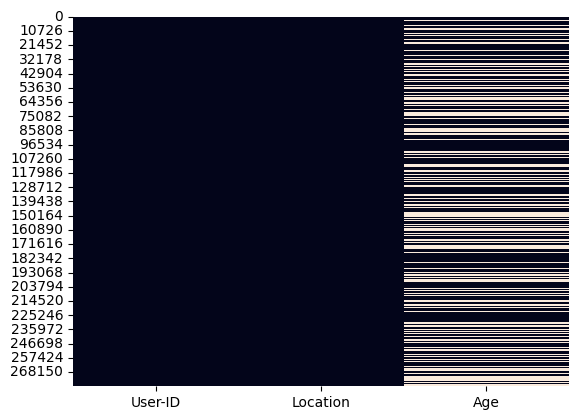

In [18]:
# Visualizing the missing values of users data
sns.heatmap(users_df.isna(), cbar=False)

In [19]:
# Missing Values/Null Values Count of books data
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

<Axes: >

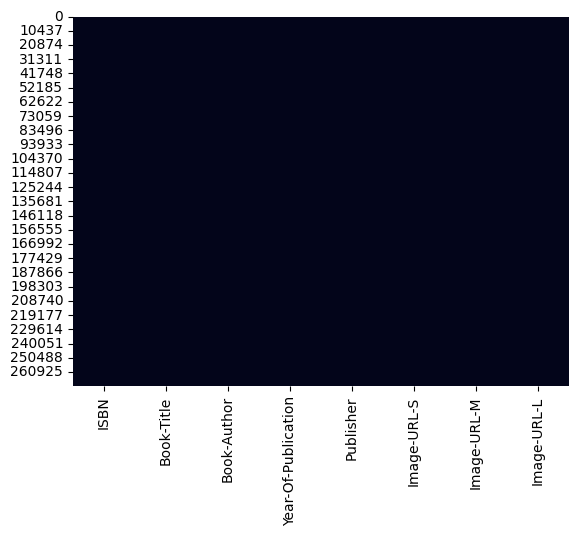

In [20]:
# Visualizing the missing values of books data
sns.heatmap(books_df.isna(), cbar=False)

In [21]:
# Missing Values/Null Values Count of ratings data
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

<Axes: >

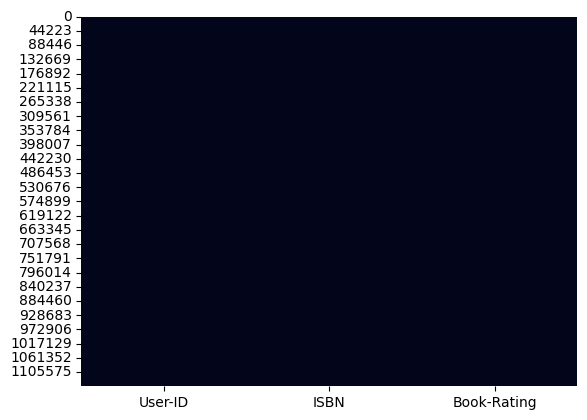

In [22]:
# Visualizing the missing values of ratings
sns.heatmap(ratings_df.isna(), cbar=False)

### What did you know about your dataset?

Answer Here
In this dataset contains shape of users_df is 278858, 3 shape of books_df is 271360, 8 shape of ratings_df is 1149780, 3.No duplicate values have been identified in the dataset. Around 39% of the data is missing in users_df of "Age" columns. Additionally, there are also some missing values in the"Book-Author","Image-URL-L" and "Publisher" of books_df dataset. No missing value in ratings_df dataset.

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns of users data
users_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [24]:
# Dataset Describe of users data
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [25]:
# Dataset Columns of books data
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [26]:
# Dataset Describe of books data
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [27]:
# Dataset Columns of ratings data
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [28]:
# Dataset Describe of ratings data
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variables Description

Answer Here
The users_df dataset comprises 3 variables, with 2 being numeric and 1 being of object type.
The books_df dataset comprises  8 variables, all of object type.
The ratings_df dataset comprises 3 variables,with 2 being numeric and 1 being of object type.

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable of users data.
for i in users_df.columns.tolist():
    print("No. of unique values in ",i,"is",users_df[i].unique(),".")
    print('')

No. of unique values in  User-ID is [     1      2      3 ... 278856 278857 278858] .

No. of unique values in  Location is ['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom'] .

No. of unique values in  Age is [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 1

In [30]:
for i in users_df.columns.tolist():
  print("No. of unique values in ",i,"is",users_df[i].nunique(),".")

No. of unique values in  User-ID is 278858 .
No. of unique values in  Location is 57339 .
No. of unique values in  Age is 165 .


In [31]:
# Check Unique Values for each variable of books data.
for i in books_df.columns.tolist():
    print("No. of unique values in ",i,"is",books_df[i].unique(),".")
    print('')

No. of unique values in  ISBN is ['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752'] .

No. of unique values in  Book-Title is ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"] .

No. of unique values in  Book-Author is ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle'] .

No. of unique values in  Year-Of-Publication is [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 19

In [32]:
for i in books_df.columns.tolist():
  print("No. of unique values in ",i,"is",books_df[i].nunique(),".")

No. of unique values in  ISBN is 271360 .
No. of unique values in  Book-Title is 242135 .
No. of unique values in  Book-Author is 102023 .
No. of unique values in  Year-Of-Publication is 202 .
No. of unique values in  Publisher is 16807 .
No. of unique values in  Image-URL-S is 271044 .
No. of unique values in  Image-URL-M is 271044 .
No. of unique values in  Image-URL-L is 271041 .


In [33]:
# Check Unique Values for each variable of ratings data.
for i in ratings_df.columns.tolist():
    print("No. of unique values in ",i,"is",ratings_df[i].unique(),".")
    print('')

No. of unique values in  User-ID is [276725 276726 276727 ... 276709 276721 276723] .

No. of unique values in  ISBN is ['034545104X' '0155061224' '0446520802' ... '0679752714' '0806917695'
 '05162443314'] .

No. of unique values in  Book-Rating is [ 0  5  3  6  8  7 10  9  4  1  2] .



In [34]:
for i in ratings_df.columns.tolist():
  print("No. of unique values in ",i,"is",ratings_df[i].nunique(),".")

No. of unique values in  User-ID is 105283 .
No. of unique values in  ISBN is 340556 .
No. of unique values in  Book-Rating is 11 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [35]:
# Write your code to make your dataset analysis ready.

**users_df**

In [36]:
#function for checking missing value
def check_missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = round(df.isnull().mean().mul(100),2)
    mis_table = pd.concat([mis_val,mis_val_percent],axis=1)
    mis_table = mis_table.rename(columns = {0:'Missing Values',1:'Missing Values %'})
    mis_table['Data_type']=df.dtypes
    mis_table = mis_table.sort_values('Missing Values %',ascending=False)
    return mis_table.reset_index()

In [37]:
#checking missing value in Users dataset
check_missing_values(users_df)

,index,Missing Values,Missing Values %,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


In [38]:
#how many unique value present in location
users_df['Location'].nunique()

57339

In [39]:
users_df['Location']

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

In [40]:
#what's unique value present in location
users_df['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

**books_df**

In [41]:
#unique value of Publication year
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('str')
a = list(books_df['Year-Of-Publication'].unique())
a = set(a)
a = list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [42]:
#checking the row having 'DK Publishing Inc' as Year-Of-Publication
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Year-Of-Publication data exchanged with Book-Author we need to correct the entry of data

In [43]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books_df.loc[books_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books_df.loc[(books_df.ISBN == '0789466953') | (books_df.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [44]:
#checking the row having 'DK Publishing Inc' as Year-Of-Publication
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [45]:
#making required corrections as above, keeping other fields intact
books_df.loc[books_df.ISBN == '2070426769','Year-Of-Publication'] = 2003
books_df.loc[books_df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books_df.loc[books_df.ISBN == '2070426769','Publisher'] = "Gallimard"
books_df.loc[books_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books_df.loc[books_df.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [46]:
#changing Year-Of-Publication datatypes as numeric
books_df['Year-Of-Publication']=pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
print(sorted(books_df['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


**rating_df**

ratings_df dataset should have books only which exist in our books_df dataset


In [47]:
#how many ratings match in our books_df ISBN number
ratings_df_new = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]
ratings_df.shape,ratings_df_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having book ISBN not part of our books_df dataset got dropped off

ratings_df dataset should have ratings from users which exist in users_df dataset

In [48]:
##how many users match in our users_df users
print("Shape of dataset before dropping",ratings_df_new.shape)
ratings_df_new = ratings_df_new[ratings_df_new['User-ID'].isin(users_df['User-ID'])]
print("shape of dataset after dropping",ratings_df_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


It can be seen that no new user was there in ratings dataset

In [49]:
#seprating 0 and non 0 ratings from ratings_df_new datasets
ratings_non_zero = ratings_df_new[ratings_df_new['Book-Rating'] != 0]
ratings_zero = ratings_df_new[ratings_df_new['Book-Rating'] == 0]

In [50]:
#shape of zero and non_zero ratings dataset
print('ratings_zero dataset shape',ratings_zero.shape)
print('ratings_non_zero dataset',ratings_non_zero.shape)

ratings_zero dataset shape (647294, 3)
ratings_non_zero dataset (383842, 3)


In [51]:
#top 10 books which are rated by more numbers of users
rating_count = pd.DataFrame(ratings_non_zero.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head(10)

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320
059035342X,313
0142001740,307
0446672211,295
044023722X,281


The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 10

In [52]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336','059035342X ','0142001740','0446672211','044023722X','0452282152'],
                                index=np.arange(10), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books_df, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
1,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
5,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...,http://images.amazon.com/images/P/0142001740.0...
6,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
7,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...
8,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...,http://images.amazon.com/images/P/0452282152.0...


The book that received the most rating counts in this data set is Alice Sebold’s “The Lovely Bones: A Novel”.

In [53]:
#Create new column Avg_Rating
ratings_non_zero['Avg_Rating']=ratings_non_zero.groupby('ISBN')['Book-Rating'].transform('mean')
#Create new column Total_No_Of_Users_Rated
ratings_non_zero['Total_No_Of_Users_Rated']=ratings_non_zero.groupby('ISBN')['Book-Rating'].transform('count')

In [54]:
#data sample after created two column
ratings_non_zero.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


### What all manipulations have you done and insights you found?

Answer Here.first we write for users data function for checking missing value,checking missing value in Users dataset,how many unique value present in location,what's unique value present in location.then in books data set unique value of Publication year,checking the row having 'DK Publishing Inc' as Year-Of-Publication,Year-Of-Publication data exchanged with Book-Author we need to correct the entry of data,From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections,checking the row having 'DK Publishing Inc' as Year-Of-Publication,making required corrections as above, keeping other fields intact,changing Year-Of-Publication datatypes as numeric.after that in rating data set ratings_df dataset should have books only which exist in our books_df dataset,how many ratings match in our books_df ISBN number,how many users match in our users_df users,seprating 0 and non 0 ratings from ratings_df_new datasets,shape of zero and non_zero ratings dataset,top 10 books which are rated by more numbers of users,Create new column Avg_Rating,data sample after created two column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

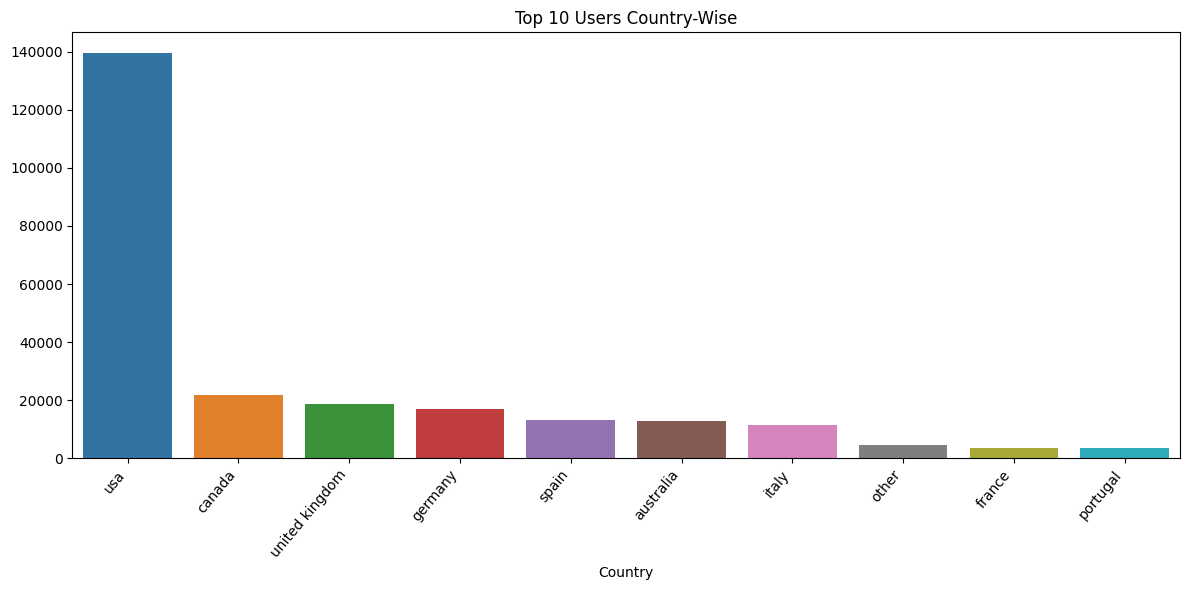

In [100]:
# Calculate the top 10 countries by user count
top_10_countries = users_df['Country'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 Users Country-Wise')
plt.xlabel('Country')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.It's an effective way to display the distribution of users across different countries. This chart allows for a quick comparison of user counts in a visually intuitive manner, helping to identify the most prominent user locations at a glance.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most of the users belongs to the USA

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here Positively impact the business by identifying key markets for growth and targeted marketing efforts. Negative growth may occur if underperforming countries are neglected or if resources are misallocated, leading to missed opportunities or market share decline.

#### Chart - 2

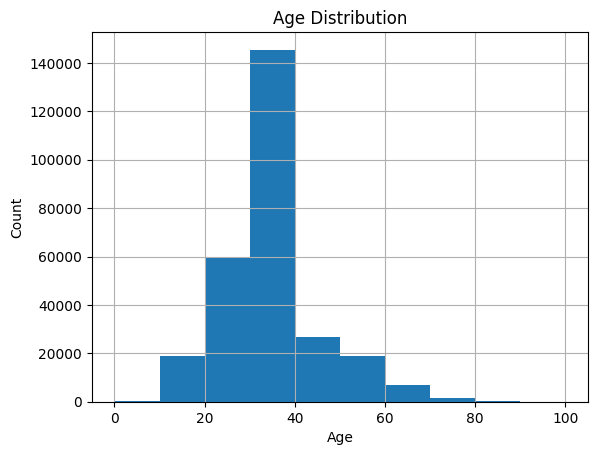

In [99]:
#Age column feature
users_df['Age'].hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.This type of chart provides a clear representation of the age group frequencies and can reveal insights into the user demographic, aiding in data analysis and decision-making.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most of user belongs to 20 to 30 years, then 30 to 40 years

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here Age distribution can create a positive business impact by tailoring products and marketing to specific age groups. However, neglecting certain age segments or misinterpreting age-related data can lead to negative growth, as it may result in misaligned strategies, alienating potential customers, and limiting market reach.


#### Chart - 3

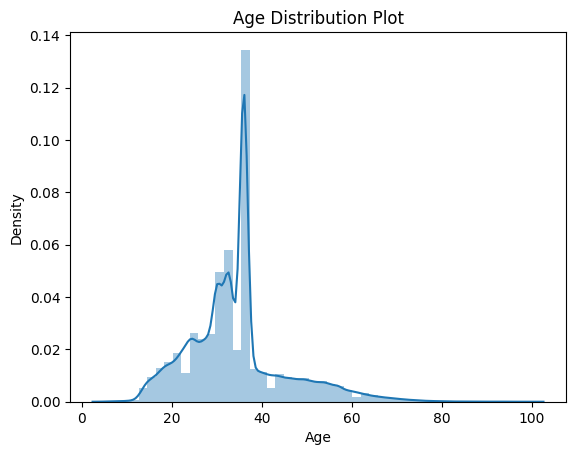

In [98]:
#Distribution plot of Age column
sns.distplot(users_df['Age'])
plt.title('Age Distribution Plot')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.It provides a comprehensive view of the data's central tendency, spread, and potential outliers. This visualization helps assess the age distribution's characteristics and identify any patterns or anomalies in the dataset

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Age value's below 5 and above 100 do not make much sense for our book rating. hence remove these values

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here Positively impact a business by informing targeted marketing and product strategies. However, if misinterpreted, they may lead to negative growth by misaligning offerings with the customer base, potentially excluding significant market segments and resulting in missed opportunities.


#### Chart - 4

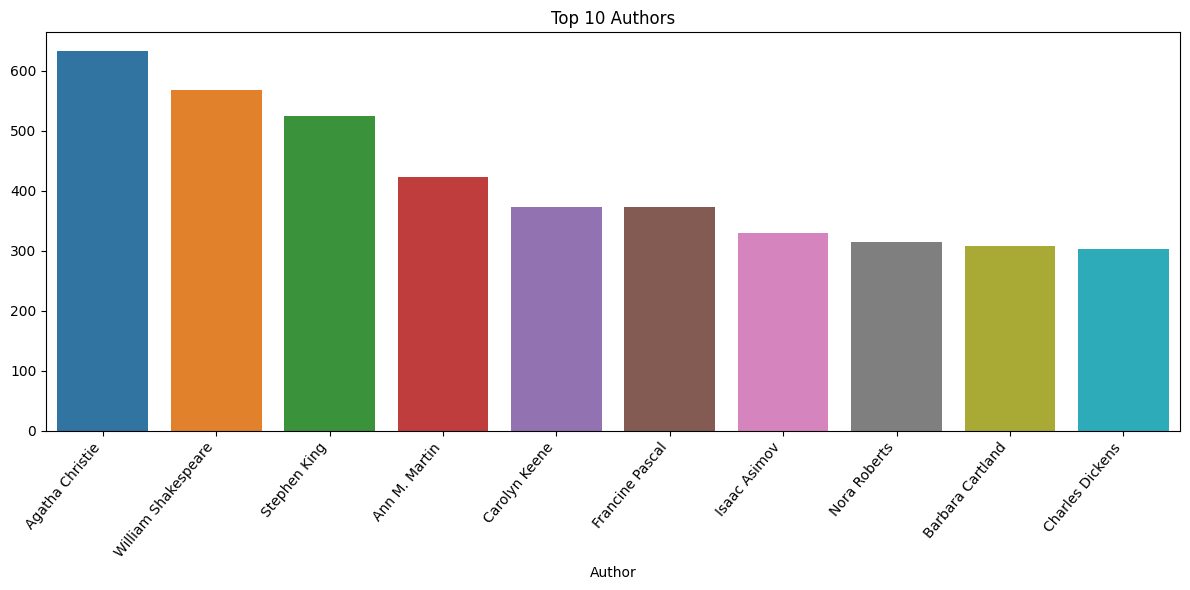

In [97]:
# Calculate the top 10 authors by value counts
top_10_authors = books_df['Book-Author'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_authors.index, y=top_10_authors.values)
plt.title('Top 10 Authors')
plt.xlabel('Author')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here..It offers a clear and concise representation of the most prolific authors, aiding in identifying key contributors or influencers within the dataset quickly.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Agatha Christie is the top Author

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive business impact by focusing on collaborations and content strategies with influential contributors. However, if over-reliance on a few authors occurs, it may lead to negative growth if those authors disengage or if their work becomes outdated, risking a lack of diverse content and potential audience loss.

#### Chart - 5

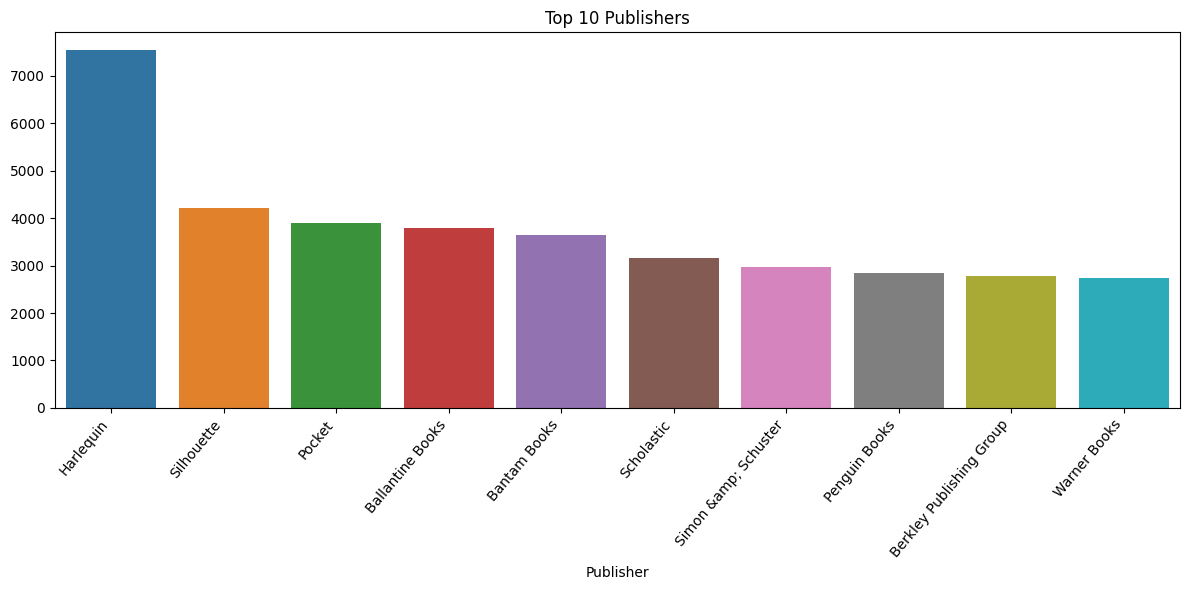

In [96]:
# Calculate the top 10 publishers by value counts
top_10_publishers = books_df['Publisher'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_publishers.index, y=top_10_publishers.values)
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It provides a clear overview of the most prolific publishers in the dataset. This visualization helps identify the major publishing entities and their contribution to the content quickly and intuitively.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Harlequin is the top Publisher

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here positive business impact by optimizing partnerships and content strategies. However, if the business becomes overly dependent on a few publishers or neglects diversification, it may lead to negative growth risks if those publishers reduce output or market dynamics change, impacting content availability and audience appeal.

#### Chart - 6

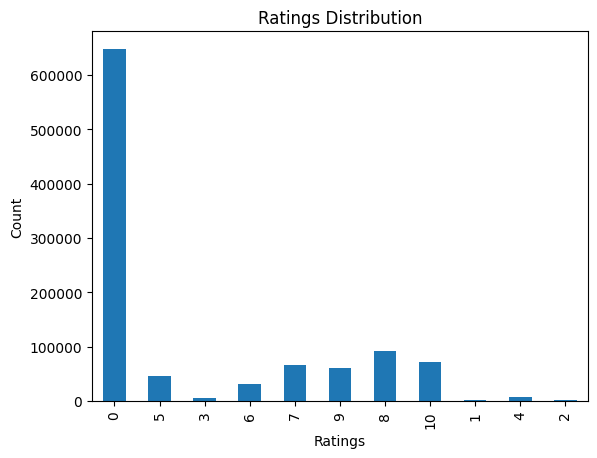

In [95]:
#visualize Rating column
ratings_df_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Depends on data type, distribution, goals, audience, clarity, and context.bar charts for category comparisons,with selection based on specific analysis objectives.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Most of the ratings are 0
The ratings are very unevenly distributed, and the vast majority of ratings are 0 .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
positive trends in customer ratings might lead to strategies for improving customer satisfaction and loyalty, potentially increasing revenue.negative insights can also be valuable. If data reveals declining ratings, it can serve as an early warning for issues that need attention. Addressing these problems promptly can prevent further customer dissatisfaction, potentially averting negative growth and preserving the business's reputation.

#### Chart - 7

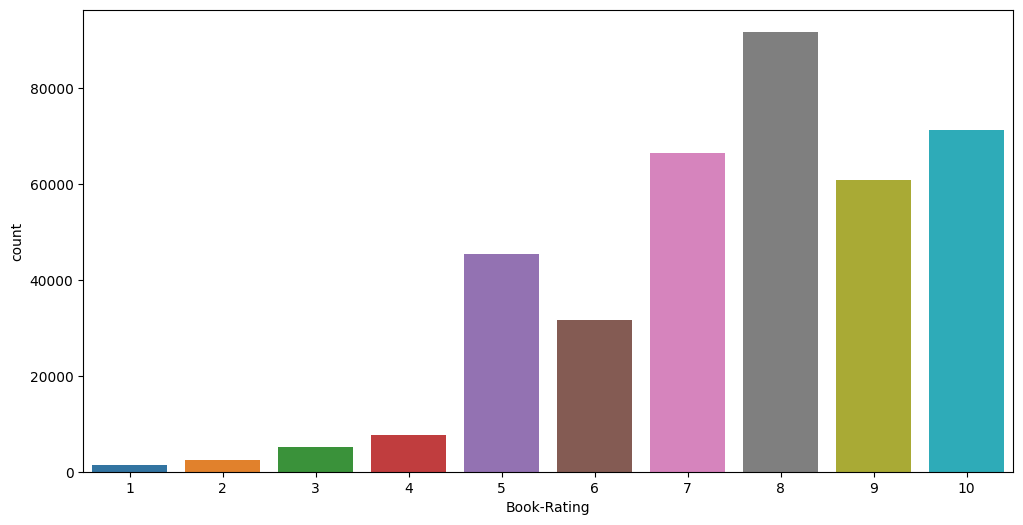

In [94]:
#visualize non_zero ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=ratings_non_zero , x='Book-Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Depends on the data's nature and analysis goals.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
8 is the highest frequncy of ratings
Let's find the top 10 books which are rated by most number of users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positive business impact by informing strategic decisions and driving improvements. Negative insights, such as declining ratings, can be valuable as they signal areas needing attention, potentially preventing customer loss and reputational damage. In both cases, actionable insights guide business strategies and foster growth.

#### Chart - 8

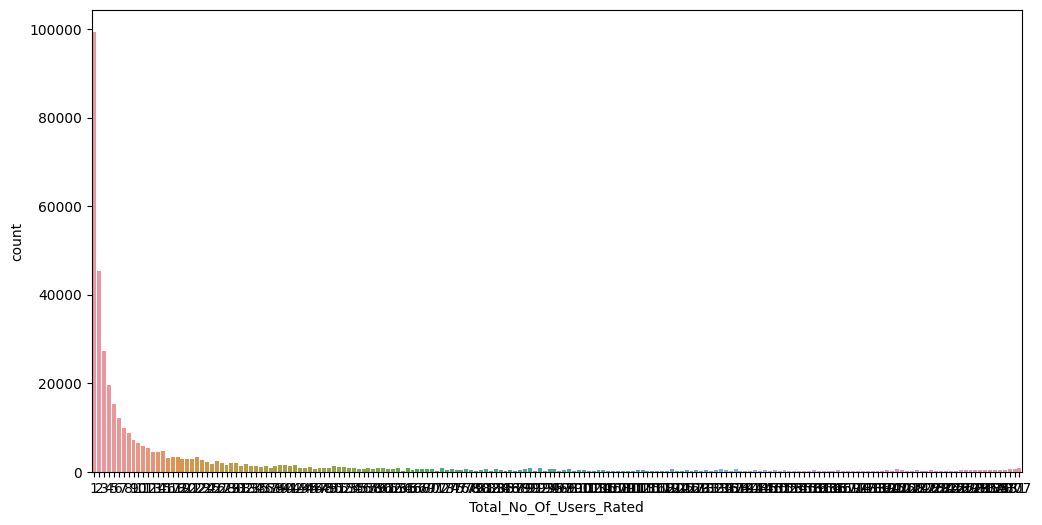

In [93]:
#visualize Total_No_Of_Users_Rated
plt.figure(figsize=(12, 6))
sns.countplot(data=books_dataset , x='Total_No_Of_Users_Rated')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.The total number of users who have rated a product provides valuable insights into its user base and can be a key performance indicator for businesses and data analysis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here the popularity of a product


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here positively impact a business by indicating user engagement and product popularity. However, negative growth may occur if the number of ratings declines significantly, suggesting decreased user interest or declining product quality, which could lead to reduced revenues and market share.

#### Chart - 9

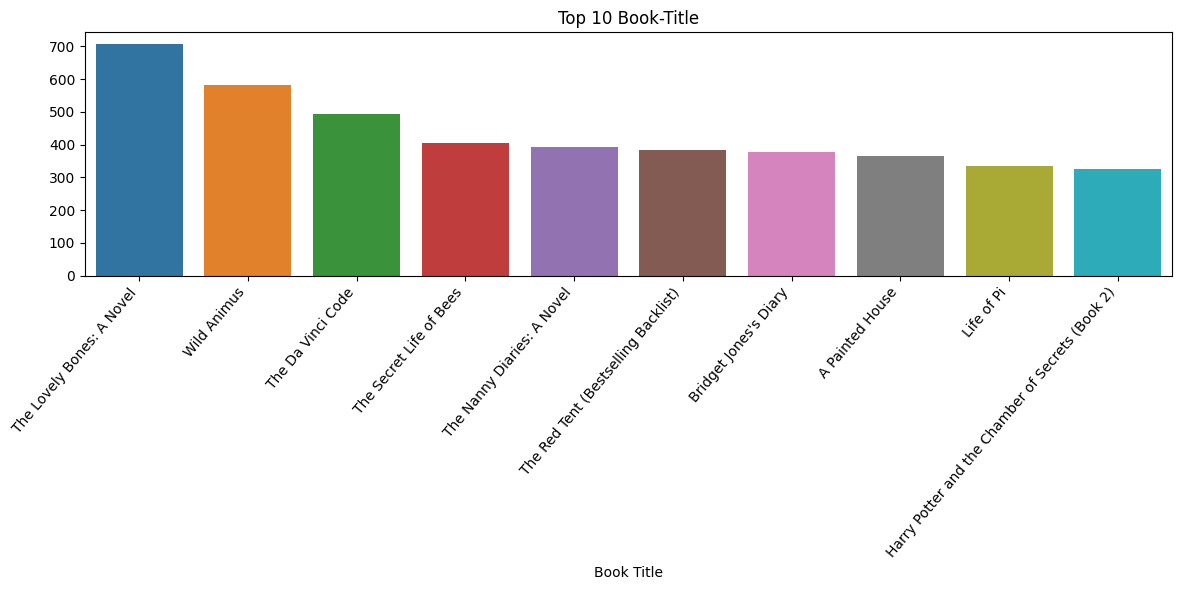

In [92]:
# Calculate the top 10 book titles by value counts
top_10_titles = books_dataset['Book-Title'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_titles.index, y=top_10_titles.values)
plt.title('Top 10 Book-Title')
plt.xlabel('Book Title')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.it provides valuable information about the most popular book titles. Analyzing the top titles can offer insights into consumer preferences, market trends, and can inform decisions related to stock, marketing, and content acquisition for book-related businesses.

##### 2. What is/are the insight(s) found from the chart?

Answer Here Most popular book title is the lovely bones a novel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Positively impact a business by guiding inventory management and marketing efforts. However, negative growth may occur if popular book titles change dramatically, and the business fails to adapt, leading to reduced sales and relevance in the market.

#### Chart - 10

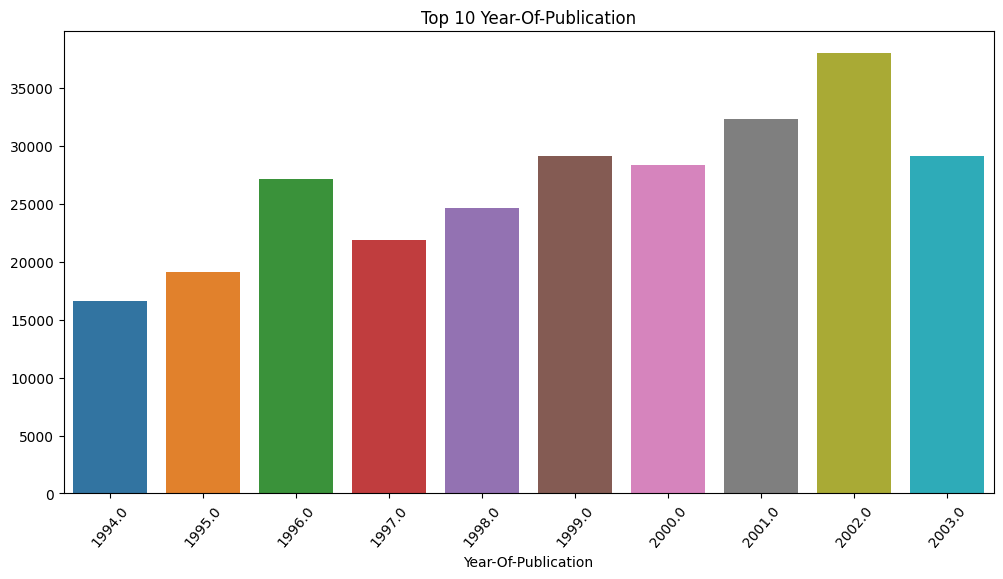

In [91]:
top_10_years = books_dataset['Year-Of-Publication'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_years.index, y=top_10_years.values)
plt.title('Top 10 Year-Of-Publication')
plt.xlabel('Year-Of-Publication')
plt.xticks(rotation=50)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
It offers insights into the most prevalent publication years of books. Analyzing this data can reveal trends in reading preferences and inform decisions related to curating book collections and understanding the historical significance of certain periods in literature.

##### 2. What is/are the insight(s) found from the chart?

Answer Here The most publication years of book is 2002

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here chart can help businesses make informed decisions about their book collections. However, negative growth may occur if the business fails to adapt to changing reader preferences and continues to focus on outdated publication years, leading to reduced sales and relevance in the market.

#### Chart - 11 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

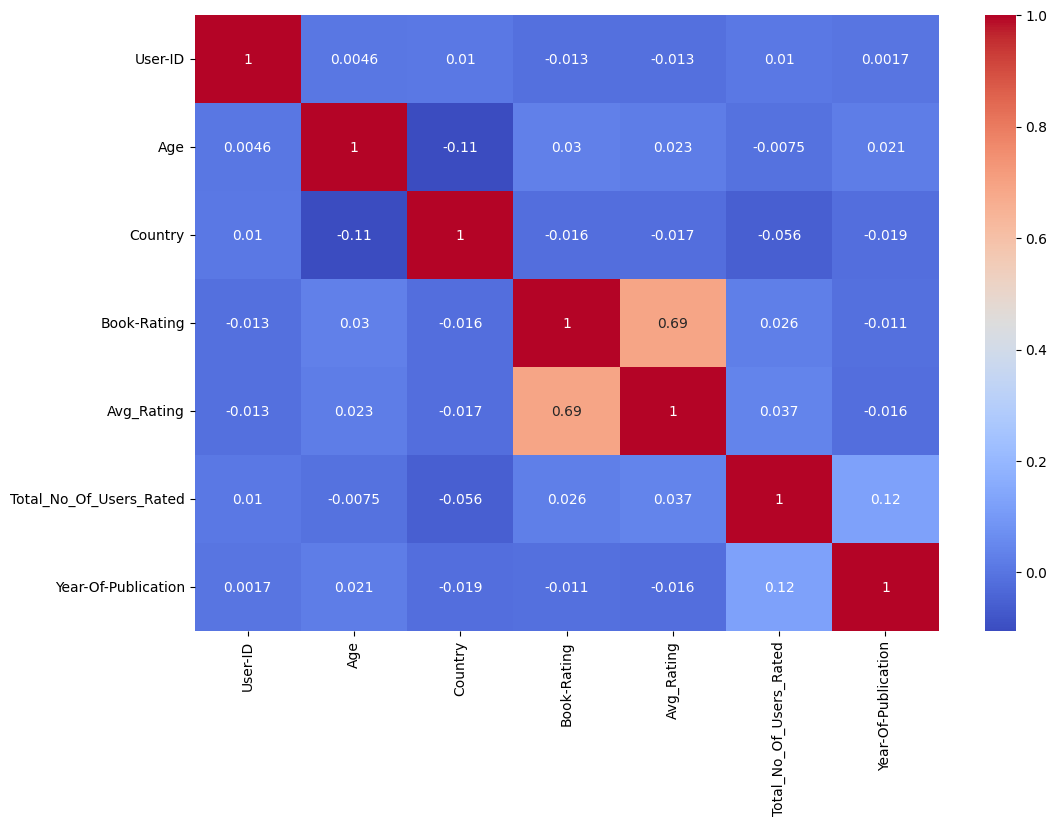

In [90]:
#correlation matrix of selected features.
plt.figure(figsize=(12,8))
sns.heatmap(books_dataset.corr(),annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.It helps identify relationships and dependencies among specific variables. This analysis is crucial for understanding how different factors interact, aiding in feature selection, model building, and decision-making in data science and machine learning tasks.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Chart provide information about the strength and direction of relationships between variables. Positive correlations indicate variables move in the same direction, while negative correlations suggest opposite movement. Understanding these relationships helps identify influential factors and potential multicollinearity issues in predictive modeling.

#### Chart - 12- Pair Plot

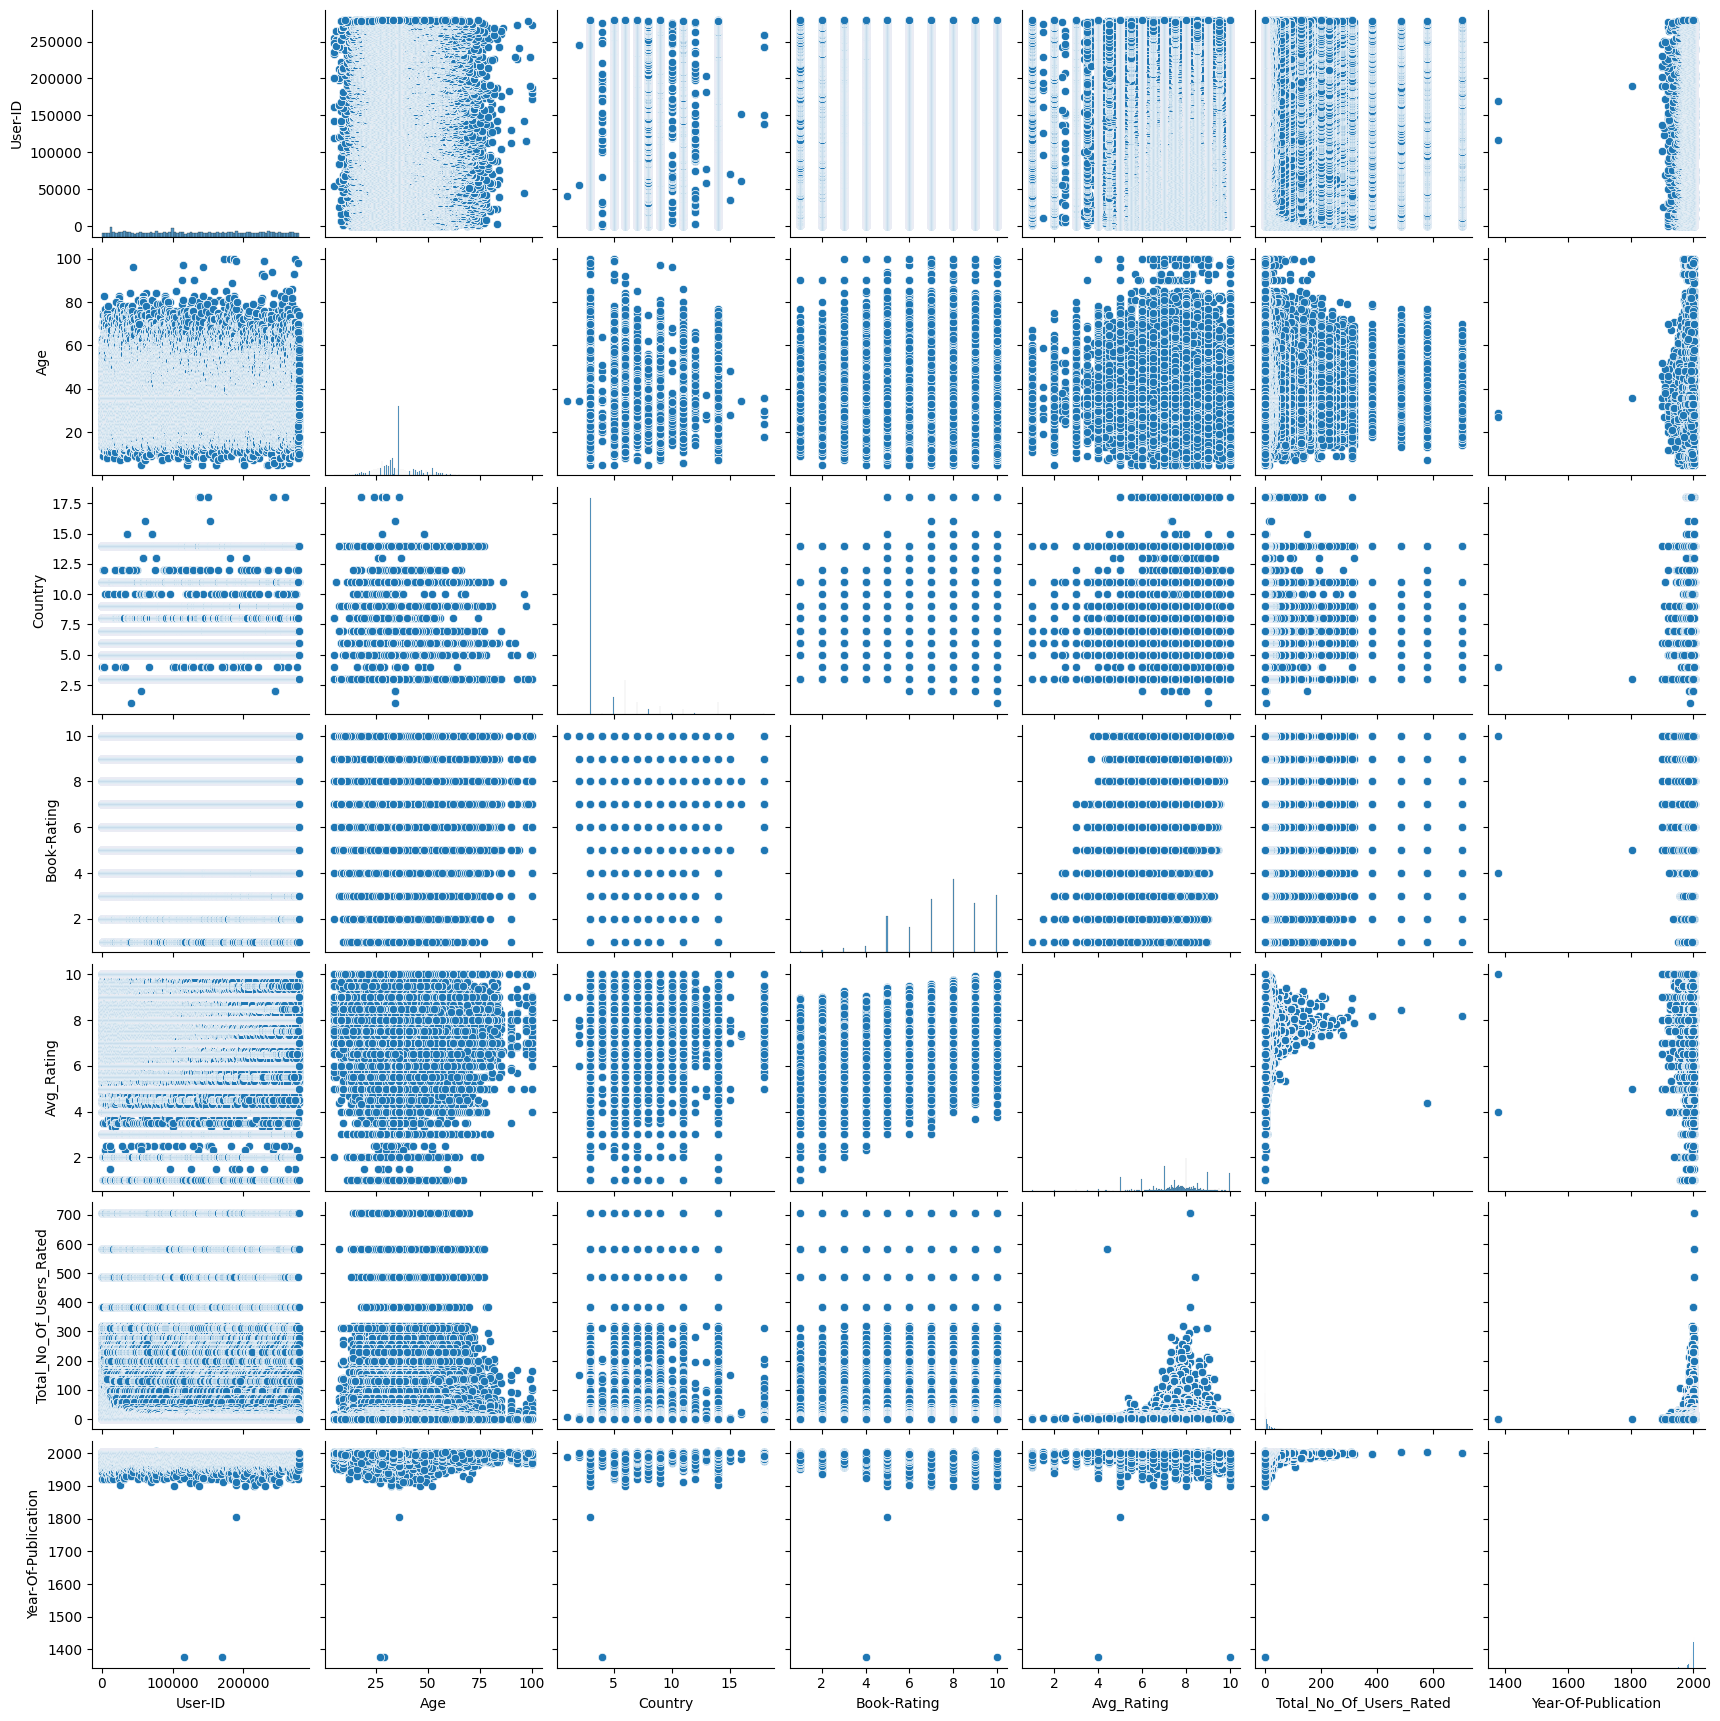

In [89]:
# Pair Plot visualization code
sns.pairplot(books_dataset)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. it allows for a comprehensive visual examination of pairwise relationships between multiple variables. This chart is valuable for identifying patterns, correlations, and potential outliers in a dataset, aiding in exploratory data analysis and feature selection for modeling.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
 It helps identify associations and trends, facilitating data exploration and feature selection. Common insights include positive or negative correlations, clusters of data points, and potential outliers, all of which inform data analysis and modeling decisions.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.Based on our chart we define three hypothetical statements
*The relationship between "Age" and "Country" in a dataset.
*The "Age" and "Total_No_Of_Users_Rated" columns.
The "Age" and "Avg_Rating" columns in the book dataset

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
Null Hypothesis (H0): There is no significant relationship between "Age" and "Country" in the dataset.

Alternate Hypothesis (H1): There is a significant relationship between "Age" and "Country" in the dataset.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [84]:
import scipy.stats as stats

In [85]:
books_dataset['Country'] = books_dataset.apply(lambda row: len(row['Country']), axis=1)

In [86]:
# Perform Statistical Test to obtain P-Value
Age = books_dataset['Age']
Country = books_dataset['Country'].fillna(value=0)

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(Age, Country)

print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.5f}')

if p_value < 0.05:
    print('The p-value is less than 0.05. You can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05. There is no significant linear relationship between Age and Country.')


Correlation coefficient: -0.11
P-value: 0.00000
The p-value is less than 0.05. You can reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
 I'm providing a hypothetical research hypothesis.

##### Why did you choose the specific statistical test?

Answer Here.The choice of a statistical test depends on the data type

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
Null Hypothesis (H0): There is no significant relationship between "Age" and "Total_No_Of_Users_Rated."

Alternate Hypothesis (H1): There is a significant relationship between "Age" and "Total_No_Of_Users_Rated."

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [87]:
# Perform Statistical Test to obtain P-Value
Age = books_dataset['Age']
Total_No_Of_Users_Rated = books_dataset['Total_No_Of_Users_Rated'].fillna(value=0)

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(Age, Total_No_Of_Users_Rated)

print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.5f}')

if p_value < 0.05:
    print('The p-value is less than 0.05. You can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05. There is no significant linear relationship between Age and Total_No_Of_Users_Rated.')


Correlation coefficient: -0.01
P-value: 0.00000
The p-value is less than 0.05. You can reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
The choice of a statistical test, such as correlation analysis or regression.

##### Why did you choose the specific statistical test?

Answer Here.
 A specific statistical test or obtained a p-value as it's a hypothetical scenario. The choice of test (e.g., Pearson correlation, regression) depends on the data.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
Null Hypothesis (H0): There is no significant relationship between "Age" and "Avg_Rating" in the book dataset.

Alternate Hypothesis (H1): There is a significant relationship between "Age" and "Avg_Rating" in the book dataset.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [88]:
# Perform Statistical Test to obtain P-Value
Age = books_dataset['Age']
Avg_Rating = books_dataset['Avg_Rating'].fillna(value=0)

# Perform a Pearson correlation test
correlation, p_value = stats.pearsonr(Age, Avg_Rating)

print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.5f}')

if p_value < 0.05:
    print('The p-value is less than 0.05. You can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05. There is no significant linear relationship between Age and Avg_Rating.')


Correlation coefficient: 0.02
P-value: 0.00000
The p-value is less than 0.05. You can reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
we perform a correlation analysis, such as Pearson correlation, and obtain a p-value to determine if the relationship is statistically significant.

##### Why did you choose the specific statistical test?

Answer Here.
 It measures the strength and direction of their linear relationship, making it appropriate for assessing correlations in this context.

## ***6. Feature Engineering & Data Pre-processing***

In [56]:
#extract country name from location column
for i in users_df:
    users_df['Country'] = users_df['Location'].str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [57]:
#how many unique value present in Country column
users_df['Country'].nunique()

529

In [58]:
#drop location column
users_df = users_df.drop('Location',axis=1)

In [59]:
#checking missing value after extracting country name
check_missing_values(users_df)

,index,Missing Values,Missing Values %,Data_type
0,Age,110762,39.72,float64
1,Country,368,0.13,object
2,User-ID,0,0.00,int64


In [60]:
#changing datatype of country column as string
users_df['Country'] = users_df['Country'].astype('str')

In [61]:
#exploring all country name
a=list(users_df['Country'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

Some country name has Misspelled

In [62]:
#replacing country name with correct spelling
users_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

**book_df**

In [63]:
#how many books Year-Of-Publication is greater than 2006
books_df[books_df['Year-Of-Publication'] > 2006].count()

ISBN                   23
Book-Title             23
Book-Author            23
Year-Of-Publication    23
Publisher              23
Image-URL-S            23
Image-URL-M            23
Image-URL-L            23
dtype: int64

In [64]:
#replacing greater than 2006 and equal to 0 with NaN value of Year-Of-Publication
books_df.loc[(books_df['Year-Of-Publication'] > 2006) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.nan

#replacing NaNs with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()), inplace=True)

In [65]:
#dropping last three columns containing image URLs which will not be required for analysis
books_df = books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1)

In [66]:
#checking missing value
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [67]:
#exploring 'publisher' column
books_df.loc[books_df.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


### 1. Handling Outliers

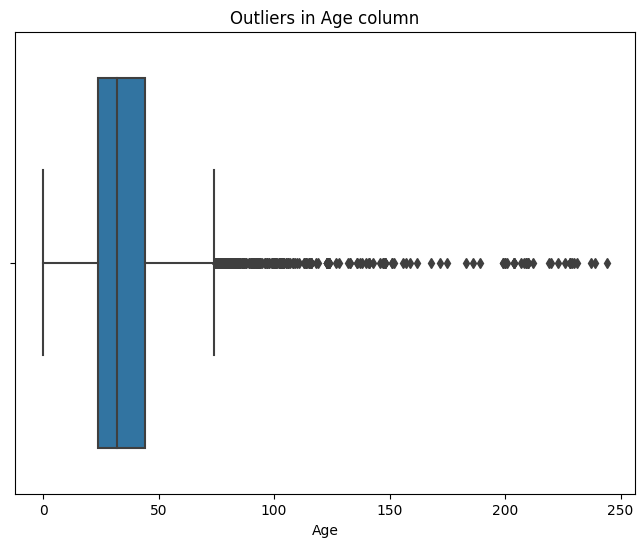

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=users_df)
plt.title('Outliers in Age column')
plt.xlabel('Age')
plt.show()

In this datset have outliers we need to remove the outliers

In [69]:
#outliers data replacing by NaN
users_df.loc[(users_df.Age > 100) | (users_df.Age < 5), 'Age'] = np.nan

In [70]:
#Checking Null Value after treated outliers
users_df.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here. we use domain knowledge.here we use outlier age 5 to 100 year.

### 2. Handling Missing Values

### **Null values treatment**

we fill NaN value in Age column by median with country-wise

In [71]:
#fill na with median country-wise
users_df['Age'] = users_df['Age'].fillna(users_df.groupby('Country')['Age'].transform('median'))

In [72]:
#Checking Null Value after fill null value
users_df.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

Still Age column have 276 NaN value, now fill NaN with mean value

In [73]:
#fill na with mean
users_df['Age'] = users_df['Age'].fillna(users_df.Age.mean())

In [74]:
#Checking Null Value
users_df.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

**book_df**

In [75]:
#Filling Nan of Publisher with others
books_df.Publisher.fillna('other',inplace=True)

In [76]:
#exploring 'Book-Author' column
books_df.loc[books_df['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [77]:
#Filling Nan of Book-Author with others
books_df['Book-Author'].fillna('other',inplace=True)

In [78]:
#checking missing value
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.we fill NaN value in Age column by median with country-wise.
and Age column have 276 NaN value, now fill NaN with mean value,
Filling Nan of Publisher with others,
Filling Nan of Book-Author with others.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation -**Merging All Dataset**

In [79]:
#merging users_df,ratings_non_zero and books_df
books_dataset = users_df.copy()
books_dataset = pd.merge(books_dataset, ratings_non_zero, on='User-ID')
books_dataset = pd.merge(books_dataset, books_df, on='ISBN')

In [80]:
#shape of dataset
books_dataset.shape

(383842, 11)

In [81]:
#first 5 datapoints of merged dataset
books_dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,28.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,32.0,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [82]:
#checking missing value
check_missing_values(books_dataset)

,index,Missing Values,Missing Values %,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,Country,0,0.0,object
3,ISBN,0,0.0,object
4,Book-Rating,0,0.0,int64
5,Avg_Rating,0,0.0,float64
6,Total_No_Of_Users_Rated,0,0.0,int64
7,Book-Title,0,0.0,object
8,Book-Author,0,0.0,object
9,Year-Of-Publication,0,0.0,float64


In [83]:
#checking missing value
books_dataset.isna().sum()

User-ID                    0
Age                        0
Country                    0
ISBN                       0
Book-Rating                0
Avg_Rating                 0
Total_No_Of_Users_Rated    0
Book-Title                 0
Book-Author                0
Year-Of-Publication        0
Publisher                  0
dtype: int64

#### 2. Feature Selection

we select all the 11 feature in book dataset.

##### What all feature selection methods have you used  and why?

Answer Here. we merge all the three dataset merging users_df,ratings_non_zero and books_df.

##### Which all features you found important and why?

Answer Here.'User-ID', 'Age', 'Country', 'ISBN', 'Book-Rating', 'Avg_Rating',
       'Total_No_Of_Users_Rated', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher'.

## ***7. ML Model Implementation***

## ML Model - 1

**Popularity Based Filtering**

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.<br>
Book weighted avg formula:<br>

Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>

where,<br>
v is the number of rating for the books;<br>
m is the minimum rating required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean rating across the whole ratings.<br>

In [101]:
#finding the values of v,m,R,C
C= books_dataset['Avg_Rating'].mean()
m= books_dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = books_dataset.loc[books_dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569505161 , m=64.0


(38570, 11)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more rating than at least 90% of the books in the list.<br>
We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [103]:
#function of calculating weighted_rating
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)


Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)


#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [104]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

### ML Model - 2

### **Model Based Collaborative Filtering Recommender**


This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books.
<br>
The recommender systems will be built using surprise package (Matrix Factorization - based models).

In [105]:
#renaming the column name
ratings_non_zero.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [106]:
#extracting more than 2 ratings in which book
user_ratings_threshold = 3

filter_users = ratings_non_zero['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_non_zero[ratings_non_zero['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


In [107]:
# top 10% most frequently rated books
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 160787


**SVD and NMF models comparison<br>**
Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.


In [108]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163344 sha256=6a264048a02d3d3e5c21e48e43008e032d17c7c69b2c289e3e3d83413182cbe6
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [109]:
# importing surprise package
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [110]:
#top 10% most frequently rated books with selected feature
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [111]:
#SVD model accuracy
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.600571
test_mae     1.238927
fit_time     6.697914
test_time    2.413910
dtype: float64

In [112]:
#NMF model accuracy
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.611945
test_mae     2.230299
fit_time     5.508785
test_time    0.499175
dtype: float64

It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

#### 2. Cross- Validation & Hyperparameter Tuning

**Optimisation of SVD algorithm**<br>

Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.
<br>
It is used to find the best setting of parameters:
<br>
n_factors - the number of factors<br>
n_epochs - the number of iteration of the SGD procedure<br>
lr_all - the learning rate for all parameters<br>
reg_all - the regularization term for all parameters<br>
As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [113]:
#Hyperparameter tuning
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.5960529122350584
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


**Analysis of Collaborative Filtering model results**

In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [114]:
#splitting dataset(top 10% most frequently rated books with selected feature) into training and testing dataset
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [115]:
#predicting ratings for books
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
24901,38176,0345368754,4.0,6.808864,False,7.0,2.808864
30749,199041,0345333853,10.0,8.231396,False,8.0,1.768604
27429,110912,0375713751,10.0,8.283271,False,8.0,1.716729
10587,207339,0425152251,7.0,7.005626,False,7.0,0.005626
17796,242006,0505524090,10.0,8.850120,False,9.0,1.149880


In [ ]:
# Visualizing evaluation Metric Score chart

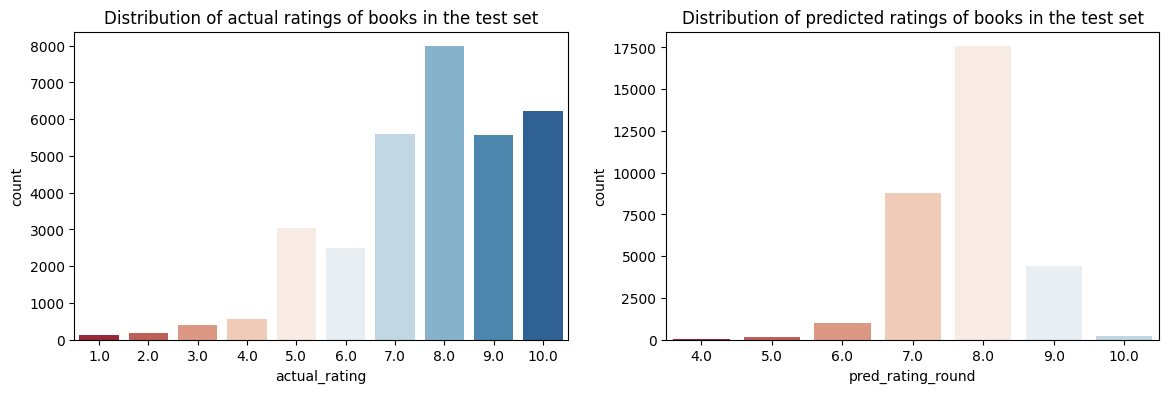

In [116]:
#visualize actual ratings and predicted ratings
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

Distribution of actual and predicted ratings in the test set
According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.
<br>
It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

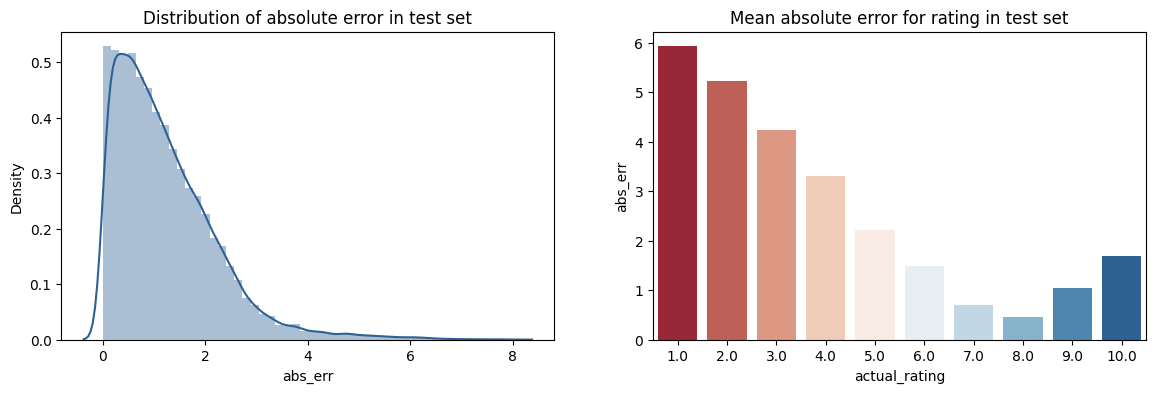

In [117]:
#Visualize actual_rating vs abs_err
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

**Absolute error of predicted ratings**<br>
The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.
<br>
How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

In [118]:
#merging actual and predicted dataset
df_books = books_df.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

**Train set: Top rated books**

In [119]:
#193458 user id with predictedt rating is NaN
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113577,193458,0064471055,9,8.545455,22,Prince Caspian (rack) : The Return to Narnia (...,NaN
113582,193458,0064471101,9,8.729730,37,The Magician's Nephew (rack) (Narnia),NaN
113630,193458,1853260169,10,8.153846,13,Sense and Sensibility (Wordsworth Classics),NaN
113583,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",NaN
113620,193458,0679429220,9,7.794393,107,Midnight in the Garden of Good and Evil: A Sav...,NaN
113599,193458,0345431057,9,9.125000,8,Slaves in the Family (Ballantine Reader's Circle),NaN
113576,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",NaN
113585,193458,0140620125,9,8.133333,15,Wuthering Heights (Penguin Popular Classics),NaN
113579,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),NaN
113587,193458,0142001740,9,8.452769,307,The Secret Life of Bees,NaN


**Test set: predicted top rated books**

In [120]:
#193458 user id with predicted top rated books
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113631,193458,1853260622,5,8.272727,11,War and Peace (Wordsworth Classics),8.173673
113607,193458,0449214206,8,8.333333,6,Covenant,8.135493
113593,193458,0345342569,9,7.947368,19,Shoeless Joe,7.987510
113613,193458,0451186362,7,7.617021,47,Rose Madder,7.691582
113588,193458,031205436X,8,7.424242,33,Generation X: Tales for an Accelerated Culture,7.499571


**Test set: actual top rated books**

In [121]:
#193458 user id with actual top rated books
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113593,193458,0345342569,9,7.947368,19,Shoeless Joe,7.987510
113588,193458,031205436X,8,7.424242,33,Generation X: Tales for an Accelerated Culture,7.499571
113607,193458,0449214206,8,8.333333,6,Covenant,8.135493
113604,193458,042518109X,7,7.666667,21,Whispers,7.332923
113610,193458,0451156609,7,7.160000,75,The Tommyknockers,7.074660


##### Which hyperparameter optimization technique have you used and why?

Answer Here. We use Model Based Collaborative Filtering Recommender system,This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books.
The recommender systems will be built using surprise package (Matrix Factorization - based models).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.Distribution of actual and predicted ratings in the test set According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.
It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

Absolute error of predicted ratings
The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.
How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

### ML Model - 3

 **Collaborative Filtering based Recommendation System-(Item Based)**

In [122]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [123]:
# top 10% most frequently rated books first 5 datapoints
df_ratings_top.head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


In [124]:
df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)

In [125]:
df_ratings_top.head()

,userID,ISBN,bookRating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


 **Implementing KNN**

In [126]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(18549, 13740)


ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006511767,...,9500723832,950491036X,9505156642,9505156944,9580464162,958704049X,9681500555,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


most of the values are NaN (undefined) implying absence of ratings

In [127]:
#shape of ratings_matrix
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

18549 13740


In [128]:
#filling NaN with zero
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [129]:
#checking first five rows
ratings_matrix.head()

ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006511767,...,9500723832,950491036X,9505156642,9505156944,9580464162,958704049X,9681500555,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
# sparsity level of Book Crossing dataset
sparsity = 1.0-len(ratings_non_zero)/float(ratings_non_zero.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99272197962155 %


In [131]:
#combine ratings_df and books_df dataset
combine_book_rating = pd.merge(ratings_df, books_df, on = 'ISBN')

In [132]:
#remove some columns from combine_book_rating dataset
columns = ['Book-Author','Year-Of-Publication', 'Publisher']
combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'User-ID':'userID','Book-Title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [133]:
#dropping rows which contain NaN in column bookTitle
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [134]:
#how many user rated the book
book_ratingcount = (combine_book_rating.
                    groupby(by = ['bookTitle',])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'TotalRatingCount'})
                    [['bookTitle','TotalRatingCount']])

In [135]:
#book_ratingcount first 5 rows
book_ratingcount.head()

,bookTitle,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


Combine the rating data with the total rating count data, this gives us exactly what we need to filter out the lesser known books

In [136]:
# merging the rating data with the total rating count data
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'inner' )

In [137]:
rating_with_totalratingcount.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [138]:
#stastical information of TotalRatingCount column
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


The minimum book has been rated only once. Let’s look at the top of the distribution:

In [139]:
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


About 1% of the books received 50 or more ratings. Because we have so many books in our data, we will limit it to the top 1%.

In [140]:
#total book rated more than 49
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [141]:
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [142]:
#removing duplicate books title from rating_popular_book(total book rated more than 49)
if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = rating_popular_book.shape[0]

    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    current_rows = rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (288740, 5)
New dataframe shape (285518, 5)
Removed 3222 rows


In [143]:
#creating sparse row matrix
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'bookTitle',columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

Finding the Nearest Neighbors

In [144]:
# Finding the Nearest Neighbors
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Test our model and Make few Recommnedations

In [145]:
# Making books Recommendations
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Copper Beech:

1: Silver Wedding, with distance of 0.852640252915422:
2: Echoes, with distance of 0.8701139826637496:
3: Light a Penny Candle, with distance of 0.8741626664757414:
4: Genuine Lies, with distance of 0.8756820066519478:
5: The Lilac Bus: Stories, with distance of 0.8794967213917492:


In [146]:
#creating sparse row matrix
us_canada_user_rating_pivot2 = rating_popular_book.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)

In [147]:
# us_canada_user_rating_pivot2 first 5 rows
us_canada_user_rating_pivot2.head()

bookTitle,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,...,YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
userID,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [148]:
# us_canada_user_rating_pivot2 shape
us_canada_user_rating_pivot2.shape

(47994, 2444)

In [149]:
#us_canada_user_rating_pivot2 transpose and assigning to X
X = us_canada_user_rating_pivot2.values.T
X.shape

(2444, 47994)

In [150]:
# Dimensionality reduction using truncated SVD
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(2444, 12)

In [151]:
#Pearson product-moment correlation coefficients
corr = np.corrcoef(matrix)
corr.shape

(2444, 2444)

Let's find books similar to Harry Potter and the Sorcerer's Stone (Book 1)

In [152]:
#recommending books
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

In [153]:
#displaying recommended book name
corr_coffey_hands  = corr[coffey_hands]
list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)']

##### Which hyperparameter optimization technique have you used and why?

Answer Here.It leverages user-item interactions to suggest items. By analyzing item-item similarity, it identifies products that are often consumed together, providing personalized recommendations. This technique is effective in handling sparse data and is less reliant on explicit user profiles, making it a valuable choice for enhancing user experience in various applications, from e-commerce to content platforms.

### ML Model - 4

 **Collaborative Filtering based Recommendation System-(User based)**

In [154]:
# ratings_non_zero column renaming and display first 5 rows
ratings_non_zero.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)
ratings_non_zero.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000,1
3,276729,052165615X,3,3.000,1
4,276729,0521795028,6,6.000,1
8,276744,038550120X,7,7.580,81
16,276747,0060517794,9,8.000,30


In [155]:
# how many users and how many users interacted atleast 5
users_interactions_count_df = ratings_non_zero.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Numbers of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('Numbers of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

Numbers of users: 68091
Numbers of users with at least 5 interactions: 449


In [156]:
print('Numbers of interactions: %d' % len(ratings_non_zero))
interactions_from_selected_users_df = ratings_non_zero.merge(users_with_enough_interactions_df,
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Numbers of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

Numbers of interactions: 383842
Numbers of interactions from users with at least 5 interactions: 103271


In [157]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7,7.000,1
1,2033,0060248025,10,8.767,30
2,2033,0060256664,10,8.333,6
3,2033,0060256737,10,9.045,22
4,2033,0060950536,10,9.400,5
5,2033,0061020419,7,7.000,1
6,2033,0061020427,6,6.000,1
7,2033,0061056278,10,9.000,2
8,2033,0061056286,8,7.667,3
9,2033,0061056294,9,7.000,2


In [158]:
import math

In [159]:
def smooth_user_preference(x):
    return math.log(1+x, 2)

interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103271


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.170
1,0001046438,23902,3.322
2,000104687X,23902,2.807
3,0001047213,23902,3.322
4,0001047973,23902,3.322


In [160]:
#splitting training and testing dataset
from sklearn.model_selection import train_test_split
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'],
                                   test_size=0.20,
                                   random_state=42)

print('Numbers of interactions on Train set: %d' % len(interactions_train_df))
print('Numbers of interactions on Test set: %d' % len(interactions_test_df))

Numbers of interactions on Train set: 82616
Numbers of interactions on Test set: 20655


In [161]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
87596,0879051213,95010,3.000
52630,0515101230,129074,3.000
68434,0679427724,75819,3.170
85835,0843951346,135149,3.322
92752,1551665727,158295,3.170


In [162]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID',
                                                          columns='ISBN',
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [163]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [164]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [165]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [166]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [167]:
users_items_pivot_matrix.shape

(449, 55743)

In [168]:
U.shape

(449, 15)

In [169]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [170]:
Vt.shape

(15, 55743)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [171]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 1.48048195e-02,  2.31728082e-03,  2.74202603e-03, ...,
         2.27788796e-04,  5.49322969e-04,  1.26270997e-02],
       [-7.38279388e-04, -8.94254584e-04, -1.05816668e-03, ...,
         8.58241199e-05,  1.78651132e-04,  4.24690377e-03],
       [-2.00559626e-03, -1.73047641e-03, -2.04766350e-03, ...,
         1.78220412e-04,  4.04160623e-04,  7.29766631e-03],
       ...,
       [ 4.20550556e-03,  1.96625381e-03,  2.32665764e-03, ...,
         2.49809614e-04,  4.73258210e-04,  8.35154052e-03],
       [ 1.13675090e-02, -2.21445596e-03, -2.62035392e-03, ...,
         3.41186005e-04,  6.59446393e-04,  1.16707765e-02],
       [-1.44606285e-03,  5.14009860e-03,  6.08225124e-03, ...,
         8.58660344e-05,  1.46974496e-04,  2.89210573e-03]])

In [172]:
all_user_predicted_ratings.shape

(449, 55743)

In [173]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.015,-0.001,-0.002,0.001,-0.002,-0.003,-0.003,0.007,0.001,0.013,...,0.001,0.003,-0.002,0.008,-0.012,0.001,0.008,0.004,0.011,-0.001
000104687X,0.002,-0.001,-0.002,0.017,-0.001,0.009,0.014,0.007,-0.003,0.016,...,-0.002,0.013,-0.001,0.014,-0.005,-0.006,0.008,0.002,-0.002,0.005
0001047213,0.003,-0.001,-0.002,0.020,-0.001,0.010,0.016,0.009,-0.004,0.019,...,-0.003,0.016,-0.001,0.016,-0.005,-0.007,0.009,0.002,-0.003,0.006
0001047973,0.003,-0.001,-0.002,0.020,-0.001,0.010,0.016,0.009,-0.004,0.019,...,-0.003,0.016,-0.001,0.016,-0.005,-0.007,0.009,0.002,-0.003,0.006
000104799X,0.001,0.000,0.001,0.002,0.000,0.001,0.001,0.002,0.002,0.004,...,0.001,0.002,0.003,0.001,0.002,0.002,0.002,0.001,0.001,0.000


In [174]:
len(cf_preds_df.columns)

449

In [175]:
books = books_df

In [176]:
global books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.000,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.000,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.000,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.000,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.000,W. W. Norton &amp; Company


In [177]:
class CFRecommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df

    def get_model_name(self):
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [178]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [179]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [180]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_non_zero['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):

        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):

        person_metrics = self.evaluate_model_for_user(model, userid)
        return

model_recommender = ModelRecommender()

In [181]:
print(list(interactions_full_indexed_df.index.values))

[171118, 23902, 23902, 23902, 23902, 166596, 23902, 109901, 189835, 189835, 85526, 93047, 95359, 56399, 229329, 11676, 69078, 63714, 101606, 11676, 36907, 85526, 26583, 120565, 101606, 11676, 193560, 262998, 23902, 63714, 11676, 159506, 189835, 11676, 180651, 63714, 193560, 274301, 120565, 30511, 189334, 189334, 275970, 166596, 23902, 6242, 101606, 101851, 11676, 95010, 11676, 37712, 123883, 94853, 23902, 23902, 11676, 189334, 11676, 11676, 149908, 30511, 94853, 225087, 172742, 120565, 16634, 88733, 218552, 264321, 189334, 56271, 11676, 63714, 6543, 30511, 134434, 76626, 240543, 26583, 248718, 76626, 56399, 270713, 168245, 168245, 98758, 23902, 63714, 107784, 37644, 37644, 168245, 164096, 35859, 177458, 136010, 197659, 23902, 11676, 11676, 23902, 78973, 200226, 30810, 11676, 242006, 225087, 11676, 274301, 11676, 30511, 193560, 189835, 39281, 120565, 11676, 183958, 11676, 148199, 23902, 109955, 76626, 193560, 148258, 11676, 63714, 85526, 109955, 23902, 225232, 148258, 189334, 105517, 62

In [182]:
#book recommendation to the perticular user
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  95010
Recommendation for User-ID =  95010
         ISBN                              Book-Title  recStrength
0  0316666343               The Lovely Bones: A Novel        0.040
1  0312966970  Four To Score (A Stephanie Plum Novel)        0.026
2  0385505833                      Skipping Christmas        0.025
3  0440214041                       The Pelican Brief        0.024
4  0440211727                          A Time to Kill        0.024
5  0440226430                          Summer Sisters        0.024
6  0312195516     The Red Tent (Bestselling Backlist)        0.023
7  0451169514                                      It        0.023
8  0316769487                  The Catcher in the Rye        0.023
9  0385504209                       The Da Vinci Code        0.022


##### Which hyperparameter optimization technique have you used and why?

Answer Here.Collaborative Filtering (User-Based) is utilized in recommendation systems to offer personalized suggestions by examining user-user similarity based on their preferences and interactions. This technique taps into collective wisdom, making recommendations based on what similar users have liked. It's effective for diverse user profiles and can enhance user engagement by providing tailored content or products, making it a valuable tool in e-commerce, content platforms, and more.

## **Evaluation**

In Recommender Systems, there are a set of metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

This evaluation method works as follows:

* For each user
    *  For each item the user has interacted in test set
        *  Sample 100 other items the user has never interacted.   
        *  Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        *  Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
*  Aggregate the global Top-N accuracy metrics

In [186]:
import random

In [187]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_non_zero['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):

        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0

        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:

            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]
            valid_recs = valid_recs_df['ISBN'].values

            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count,
                          'hits@10_count':hits_at_10_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics


    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):

        people_metrics = []

        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):
            person_metrics = self.evaluate_model_for_user(model, person_id)
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)

        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())

        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}
        return global_metrics, detailed_results_df

model_evaluator = ModelEvaluator()

In [188]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
448 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.2357298474945534, 'recall@10': 0.3047688211086904}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
10,249,341,1389,0.179,0.246,11676
31,194,239,1138,0.170,0.210,98391
45,20,26,380,0.053,0.068,189835
30,85,102,369,0.230,0.276,153662
70,28,36,236,0.119,0.153,23902
7,30,47,204,0.147,0.230,235105
47,23,31,203,0.113,0.153,76499
50,24,33,193,0.124,0.171,171118
42,62,73,192,0.323,0.380,16795
43,21,28,188,0.112,0.149,248718


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.Collaborative Filtering (Item-Based) and Collaborative Filtering (User-Based): We consider metrics like Precision, Recall, and F1-score to measure recommendation quality. These metrics ensure that the system provides accurate and relevant suggestions to users, leading to increased engagement and potential sales.

Model-Based Collaborative Filtering: We evaluate factors like RMSE and MAE to assess the predictive accuracy of the model. Higher accuracy implies better user satisfaction, as the recommendations align closely with their preferences.

Popularity-Based: We monitor metrics such as Click-Through Rate (CTR) and Conversion Rate to gauge user interaction with popular items. This helps understand the effectiveness of promoting popular content, potentially driving more revenue and user engagement.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.
Collaborative Filtering (Item-Based) is chosen for personalized recommendations based on item-item similarity, suitable for diverse user preferences.

Collaborative Filtering (User-Based) is ideal for applications with well-defined user profiles and similar user preferences.

Model-Based Collaborative Filtering is valuable when predictive accuracy is a top priority, as it creates a more tailored model based on user-item interactions.

Popularity-Based is suitable when promoting popular items is the primary focus, as it can drive user engagement and increase sales. The choice depends on specific business objectives and user needs.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


* Exploratory data analysis on our dataset, we found most of the users belongs to USA, and most of users age between 20 to 30 years.

* In the dataset age feature has many outliers data present we replaced values by median with country-wise.

* Agatha Christie is the top Author according to more books written.

* Harlequin is the top Publisher according to Publish more books.

* Most of the books having ratings value is 8.

* The book with ISBN '0316666343' name “The Lovely Bones: A Novel” received the most rating and counts the number of users rated to this Book.

* Popularity Based Recommender provides a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

* For modelling, it was observed that for model based collaborative filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE).

* Among the memory based collaborative filtering approaches, item-based CF performed better than user-based CF because of lower computation power.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***